In [83]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [103]:
DATA_PATH = "dataindo22050.json"
SAVED_MODEL_PATH = "batch8 175.h5"
EPOCHS = 1
BATCH_SIZE = 10
PATIENCE = 50
LEARNING_RATE = 0.00001


In [104]:
def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):

    # memuat dataset
    X, y = load_data(data_path)

    # membuat train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [105]:
def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):

    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu',))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    model.add(tf.keras.layers.Dense(32, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model

In [106]:
def train(model, epochs, batch_size, X_train, y_train, X_validation, y_validation):

    #earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.0001, patience=10)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation))
    return history

In [107]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

In [108]:
def main():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)
    #print(X_train.shape)
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

    print(input_shape)
    # save model
    #model.save(SAVED_MODEL_PATH)

Training sets loaded!
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 42, 11, 32)        320       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 21, 6, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 19, 4, 64)         18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 10, 2, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 9, 1, 128)         32896     
                                                                 
 max_pooling2d_47 (MaxPoolin  (

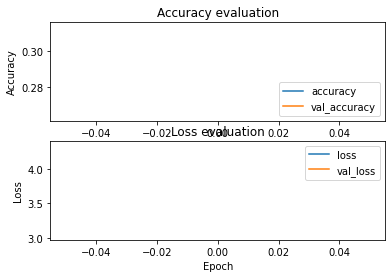

5/5 [==============================] - 0s 13ms/step - loss: 3.1337 - accuracy: 0.2857

Test loss: 3.133650541305542, test accuracy: 28.57142984867096
(44, 13, 1)


In [109]:
if __name__ == "__main__":
    main()
